Dataset shape: (1000, 60)
Data types:
 filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean      

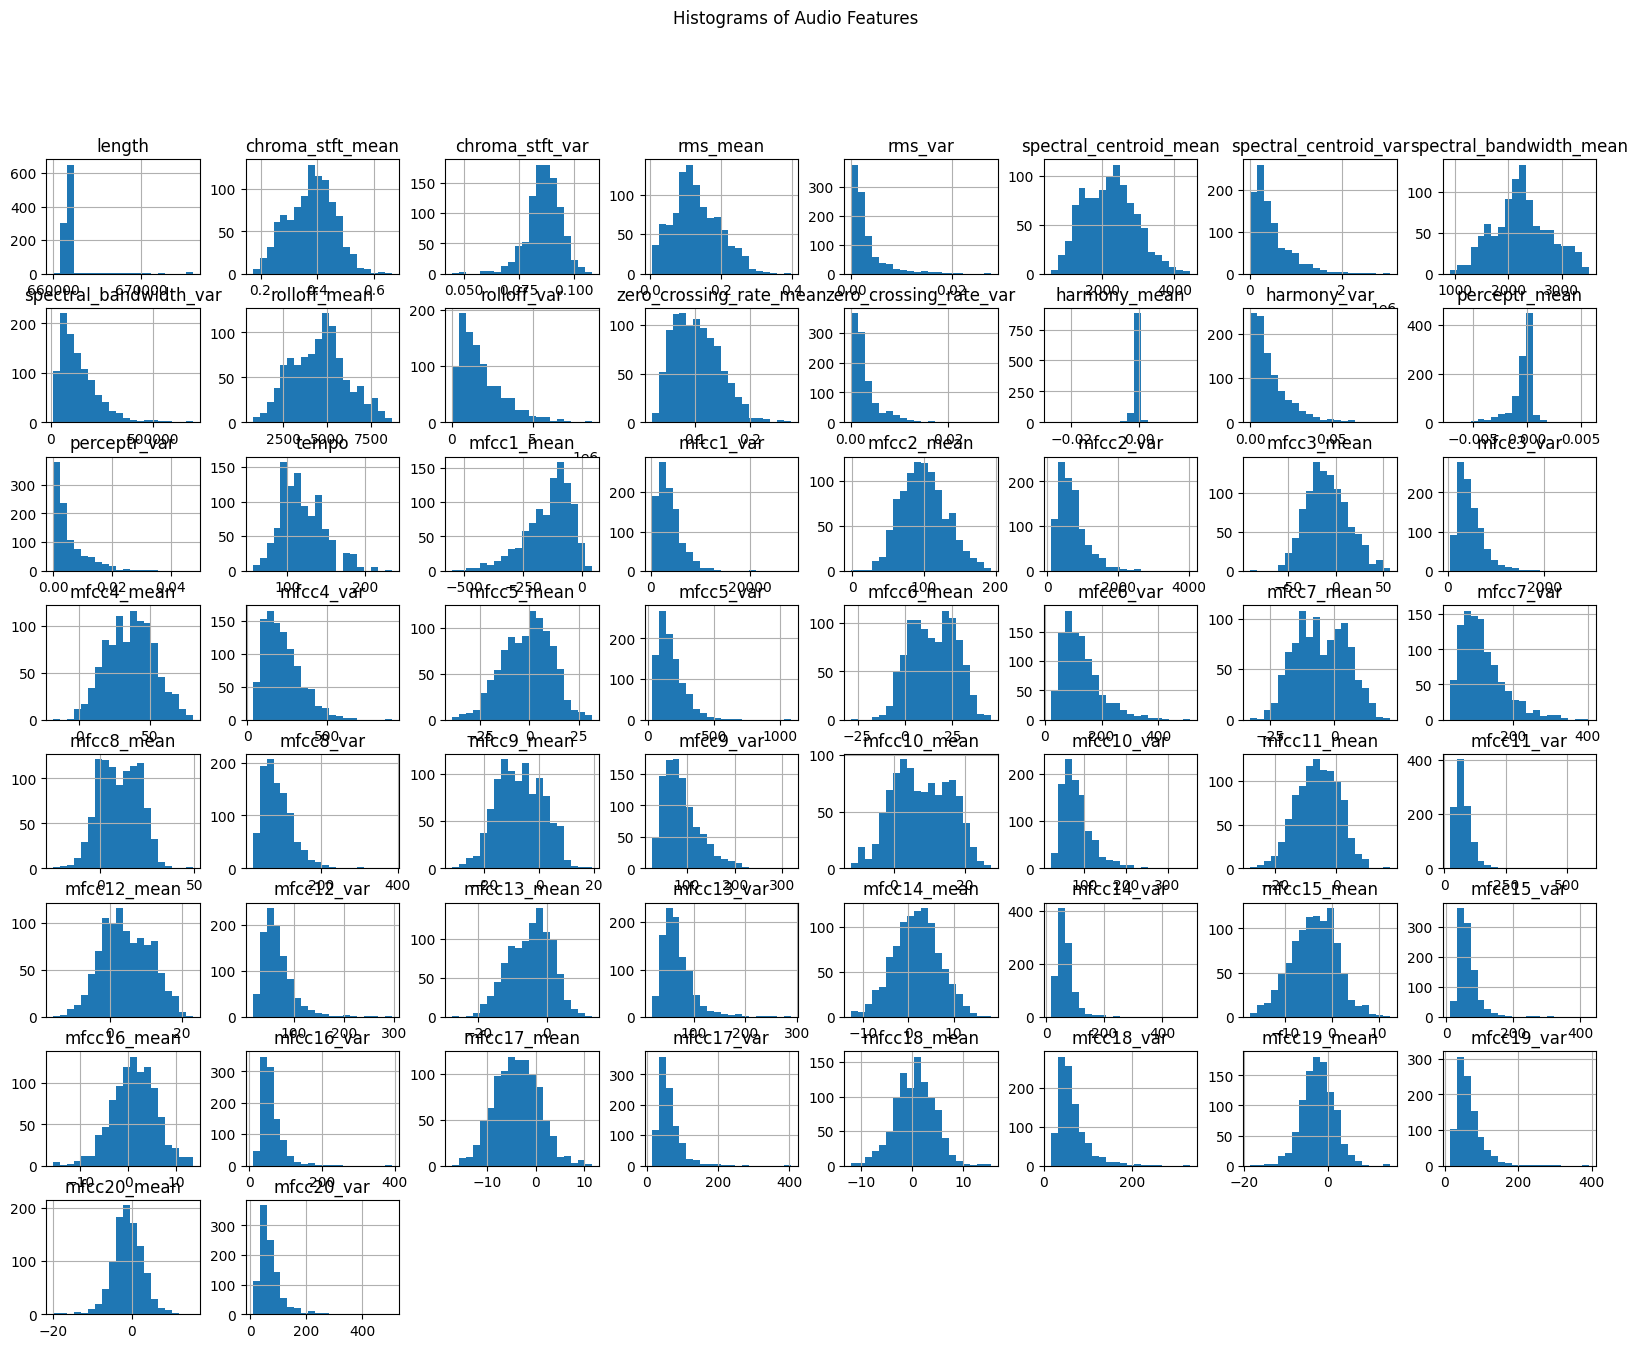

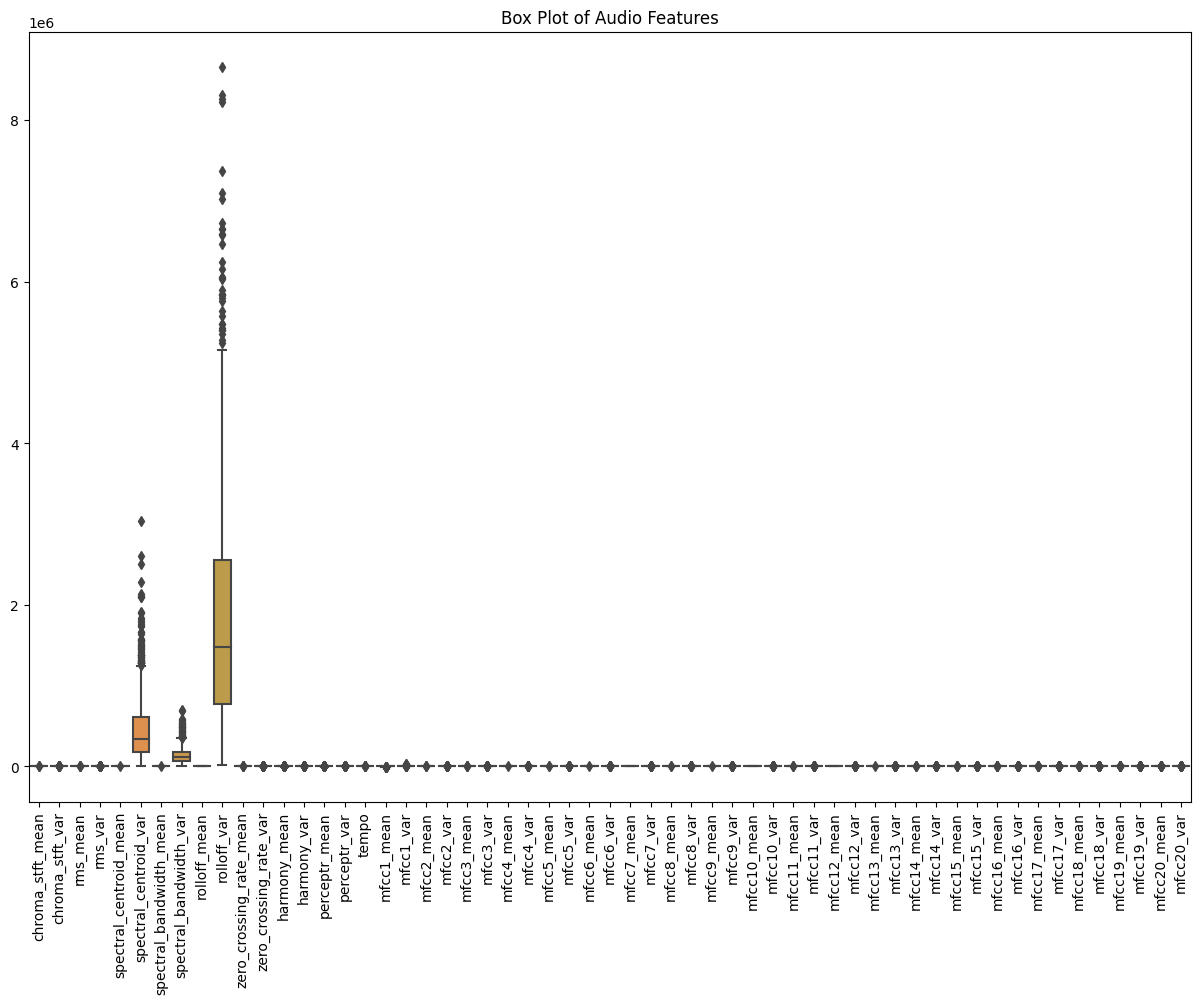

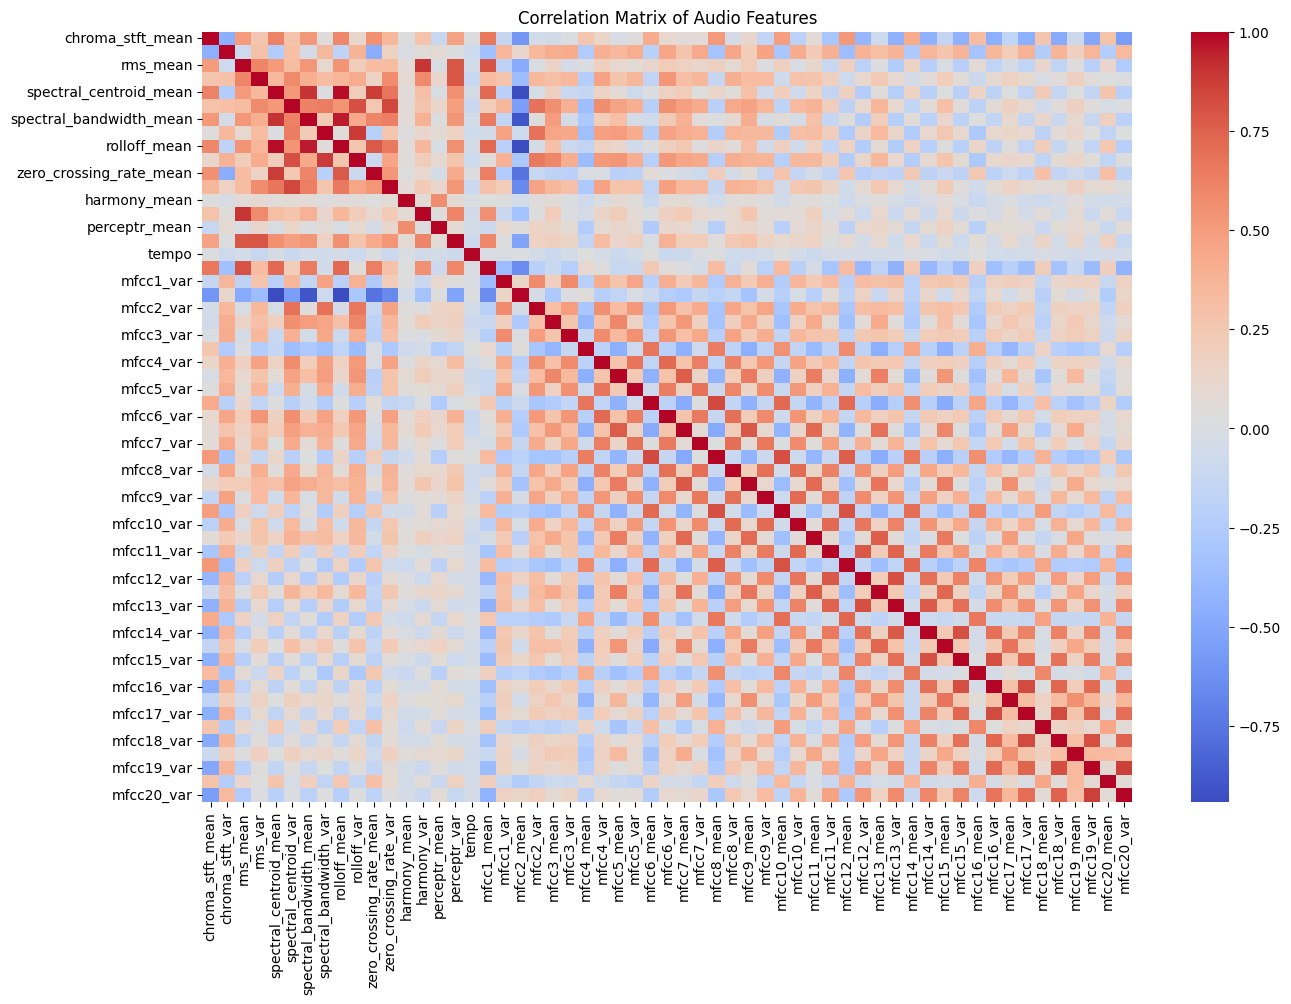

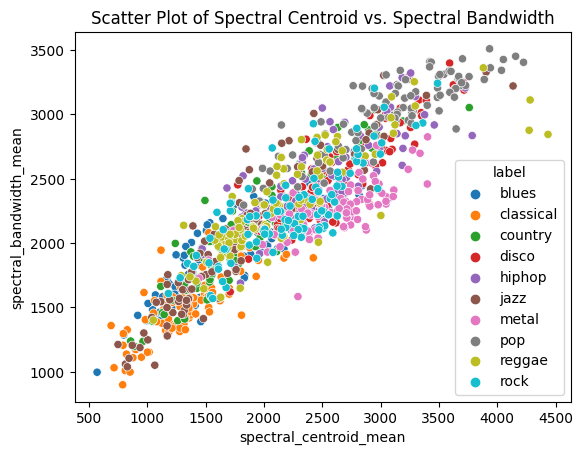

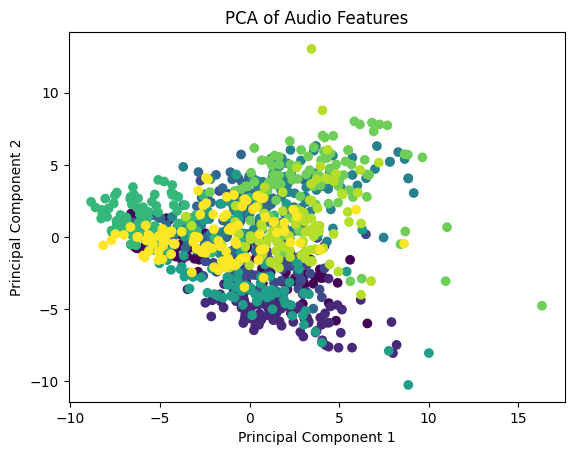

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
file_path = '/features_30_sec.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Basic Structure
print("Dataset shape:", df.shape)
print("Data types:\n", df.dtypes)
print("Missing values:\n", df.isnull().sum())

# Statistical Summary
print("Descriptive Statistics:\n", df.describe())

# Class Distribution
print("Class Distribution:\n", df['label'].value_counts())

# Visualization
# Histograms
df.hist(figsize=(20, 15), bins=20)
plt.suptitle('Histograms of Audio Features')
plt.show()

# Box Plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(['filename', 'length', 'label'], axis=1))
plt.xticks(rotation=90)
plt.title('Box Plot of Audio Features')
plt.show()

# Correlation Matrix
corr_matrix = df.drop(['filename', 'length', 'label'], axis=1).corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features')
plt.show()

# Feature Relationships
# Scatter Plot (example)
sns.scatterplot(data=df, x='spectral_centroid_mean', y='spectral_bandwidth_mean', hue='label')
plt.title('Scatter Plot of Spectral Centroid vs. Spectral Bandwidth')
plt.show()

# Pair Plot (optional, can be very heavy computation for large datasets)
# sns.pairplot(df.drop(['filename', 'length'], axis=1), hue='label')

# Preprocessing Insights
# Standardizing Features
features = df.drop(['filename', 'length', 'label'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# PCA for Dimensionality Reduction (optional)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['label'].astype('category').cat.codes)
plt.title('PCA of Audio Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Documenting Findings
# (Add any specific observations or notes here)

# End of the EDA script